### Titanic Investigate Analysis
This is a project I use pandas and matplotlib to explore the Kaggle Titanic dataset.

There are 3 steps:
- Load and clean data
- Summarize data and Questions
- Explore data and answer questions

#### Step 1. Load and clean data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

There're 891 observations and 10 attributes might associate with whether a passenage survived or not during the tragedy.

In [4]:
len(titanic_data)-titanic_data.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 3 columns involve missing values. Age, Cabin and Embarded.
For 'Age', it's reasonable to replace age by the mean age here. 

In [6]:
mean_age = titanic_data['Age'].mean()
titanic_data['Age'] = titanic_data['Age'].fillna(mean_age)

For 'Cabin', the missing value takes up to 80% and any replacement might significantly bias the result, so I will remove this column.

In [7]:
titanic_data = titanic_data.drop('Cabin', axis=1)

For 'Embarded', here I drop the 2 rows with missing values:

In [9]:
titanic_data = titanic_data.dropna()
# Beside, I will drop 'PassengerId' because it's meaningless
titanic_data = titanic_data.drop('PassengerId', axis=1)
# Now there's no missing data
len(titanic_data)-titanic_data.count()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [10]:
# For future usage, I create a new column named age_group
def group_by_age(i):
    return str(int(i/10)*10)+'-'+str(int(i/10)*10+10)
titanic_data['Age_group'] = titanic_data['Age'].apply(group_by_age)

### Step 2: Summarize data and Questions

In [11]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-30
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-40
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20-30
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-40
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-40


From the data, I have 3 questions to be answered:
* How demographic data distributed on the board and how are they distributed among different classes?
* Did females have bigger survival rate? Any difference of age between survived women and unsurvived women?
* Who were most likely to get bigger survival chance? (multi-variable analysis)

### Step 3: Investigate and answer the questions

#### 1. How demographic data distributed on the board and how are they distributed among different classes?

In [13]:
titanic_data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

There was 577 males and 312 females, males took up over **64%**

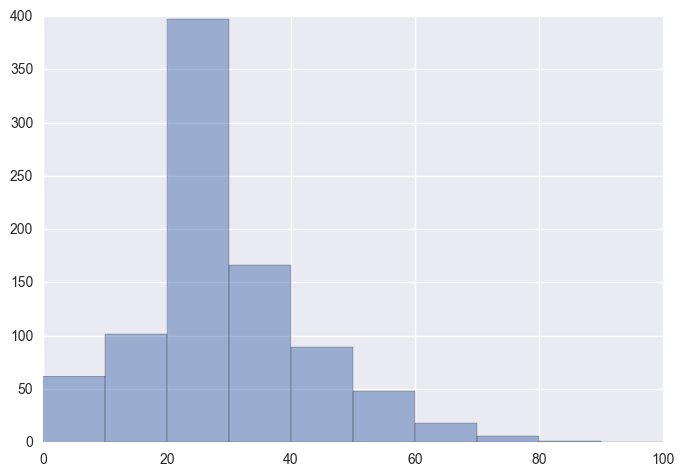

In [17]:
bins = np.linspace(0, 100, 11)
plt.hist(titanic_data['Age'],bins, alpha=0.5)
plt.show()

There are more people aging 20-30 than other.

Among class 1 (Top class), class 2 and class 3:

In [22]:
# Number of people in different classes:
titanic_data['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [25]:
data_by_class = titanic_data.groupby('Pclass')
data_by_class.mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.626168,36.927073,0.420561,0.359813,84.193516
2,0.472826,29.866958,0.402174,0.380435,20.662183
3,0.242363,26.403259,0.615071,0.393075,13.675550


Some interesting conclusion can be drawn:
- Class 1, the top class, though 4-5 times more expensive than other 2 classes, assocated with much higher survival rate
- People in class one are generally older than in other 2 classes
- Class 3 people had more siblings on board, however associated with lower survival rate

#### 2. Did females have bigger survival rate? Any difference of age between survived women and unsurvived women?

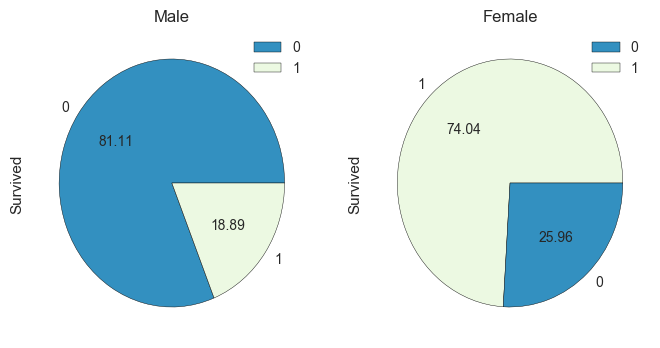

'\nQuestions:\n1. how to rotate 2nd plot\n2. figsize why 8,4, not 4,4 each\n3. how to change legend, and remove in-pic legends\n4. better visualization method?\n'

In [33]:
import seaborn as sns
data_male = titanic_data.loc[lambda df: df.Sex == 'male', :]
data_female = titanic_data.loc[lambda df: df.Sex == 'female', :]
# colors = ['#19b9ef', '#e28d7d']
#  e28d7d
fig, axes = plt.subplots(nrows=1, ncols=2)
data_male['Survived'].value_counts().plot(kind= 'pie', \
                                          title='Male', ax=axes[0], \
                                          figsize=(8, 4),autopct='%.2f', \
                                          fontsize=10, \
                                          colors = ['#3390c0','#ecf9e2'],\
                                          legend=True)

data_female['Survived'].value_counts().plot(kind= 'pie', \
                                          title='Female', ax=axes[1], \
                                          figsize=(8, 4),autopct='%.2f', \
                                          fontsize=10, \
                                          colors = ['#ecf9e2','#3390c0'],\
                                          legend='reverse')
plt.show()

'''
Questions:
1. how to rotate 2nd plot
2. figsize why 8,4, not 4,4 each
3. how to change legend, and remove in-pic legends
4. better visualization method?
'''

Females (with survival rate over **74%**) were more likely to survive than males (with less than **19%** chance).

Now let's exam more details within women group, is there difference of age between survived women and unsurvived women?

Age:
Survived females: count    231.000000
mean      28.797265
std       12.891770
min        0.750000
25%       22.000000
50%       29.699118
75%       35.000000
max       63.000000
Name: Age, dtype: float64
Non-survived females: count    81.000000
mean     26.023272
std      12.234723
min       2.000000
25%      18.000000
50%      29.000000
75%      30.000000
max      57.000000
Name: Age, dtype: float64


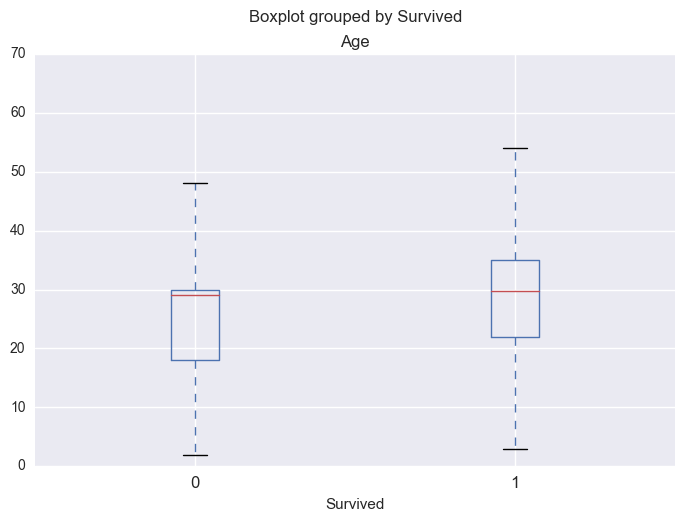

In [35]:
survived_female = data_female.loc[lambda df: df.Survived == 1, :]
non_survived_female = data_female.loc[lambda df: df.Survived == 0, :]

print 'Age:'
print 'Survived females: %s' % survived_female['Age'].describe()
print 'Non-survived females: %s' % non_survived_female['Age'].describe()

data_female.boxplot(column='Age', by='Survived')
plt.show()

The two plots are pretty close so I set up hypothesis to test if age is significant different of age between above 2 groups:

Null hypothesis:
$H_0$: $\mu_1 = \mu_2$, there's no difference with age between survived women and unsurvived women

Alternative hypothesis:
$H_A$: $\mu_1 < \mu_2$, women survived were significantly older than women who didn't survive


$\mu_1$ is mean age of survived women
$\mu_2$ is mean age of unsurvived women


In [34]:
from scipy import stats
# Assume the individuals within each groups were independent
# because Titanic was huge and individuals might not have big chance to make influence on others
# And these 2 groups have different size, here I use independent t-test
stats.ttest_ind(survived_female['Age'], non_survived_female['Age'])

Ttest_indResult(statistic=1.6881197176366378, pvalue=0.09239394429827047)

As p-value > 0.05, there's no convincing evidence that there's big difference between women who survived and who didn't, and the 'Age' seems not a significant indicator for survival of women.

#### 3. Who were most likely to get bigger survival chance? (multi-variable analysis)

Most people will care about who would be most likely to survive in such accident. Let's look at gender, age and class and put together for analysis.

In [41]:
data_by_class_sex = titanic_data.groupby(['Pclass','Sex'],as_index=False)[['Survived']].mean()

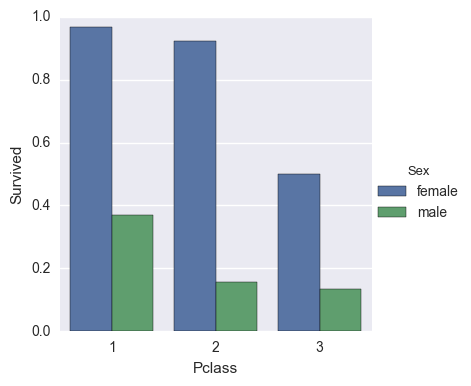

In [42]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data_by_class_sex, kind="bar")
plt.show()

From above plot, we can see class1 had much higher survival rate than other 2 classes among male. However, for female, survival rate at class 1 and 2 are quite similar, though they both were larger than class 3.

Then let's exam by age:

In [43]:
data_by_age = titanic_data.groupby(['Pclass','Age_group'],as_index=False)[['Survived']].mean()
data_by_age

,Pclass,Age_group,Survived
0,1,0-10,0.666667
1,1,10-20,0.833333
2,1,20-30,0.593750
3,1,30-40,0.775510
4,1,40-50,0.594595
5,1,50-60,0.555556
6,1,60-70,0.250000
7,1,70-80,0.000000
8,1,80-90,1.000000
9,2,0-10,1.000000


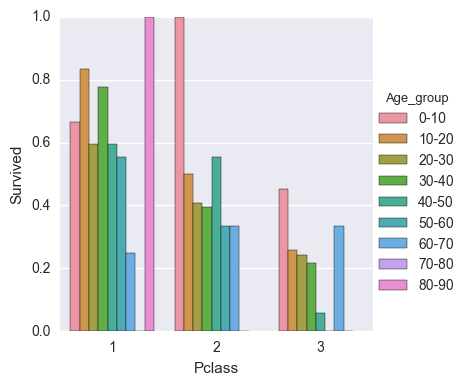

In [44]:
sns.factorplot(x="Pclass", y="Survived", hue="Age_group", data=data_by_age, kind="bar")
plt.show()

People aging 80-90 in class1 and 0-10 in class2 got highest survival rate both 100%, then in class1, people aging 0-20 and 30-40 got highest survival rate. Now check all categorical facotrs together:

In [91]:
attributes = ['Pclass','Sex','SibSp','Parch','Age_group']
mean_survive_all_class = titanic_data.groupby(attributes)[['Survived']].mean()

To be careful, let's check count for each cell:

In [92]:
count_survive_all_class = titanic_data.groupby(attributes)[['Survived']].count()

Then I will remove rows with count less than 10 in mean_survive_by_age_sex_class:

In [93]:
merged_all = mean_survive_all_class.merge(count_survive_all_class, how='inner', left_index=True, right_index=True)

In [95]:
merged_all = merged_all[(merged_all.Survived_y >= 10) & (merged_all.Survived_x >= 0.5)]
merged_all.sort_values(by='Survived_x', ascending=False)

Survived_x  Survived_y
Pclass Sex    SibSp Parch Age_group                        
1      female 0     0     20-30        1.000000          10
                          30-40        1.000000          11
2      female 0     0     20-30        0.909091          11
                          30-40        0.900000          10
3      female 0     0     10-20        0.666667          12
                          20-30        0.641026          39
1      male   0     0     30-40        0.538462          13
3      female 1     0     20-30        0.538462          13

Therefore, these people were most likely to survive:
- class1, female, 20-40, no siblings or parents or children
- class2, female, 20-40, no siblings or parents or children
- class3, female, 10-30, no siblings or parents or children